**Question 1** : In the folowing definition of a probabilistic model:

$Y \sim \mathcal{N}(\mu, \sigma)$

$\mu \sim \mathcal{N}(0, 2)$

$\sigma \sim \mathcal{halfnormal}(0.75)$

1.1 - Identify the prior and the likelihood.

1.2  - How many parameters will the posterior have?

1.3 - Compare it with the model for the coin-flipping problem.

1.4 - Write Bayes' theorem for the model.


**Answers**

$1.1$ Here the priors are the distribution $\mu$ and $σ$ ; whereas the Likelihood is the distribution $Y$.

$1.2$ The posterior will have two parameters $\mu$ and $σ$.

$1.3$ This is different from the coin flipping problem as it just has one parameter to look for.

$1.4$ Bayes' Theorem for the model is as follows:

\begin{align}
        P(\mu,σ | Y) = \frac{P(Y | \mu,σ) \cdot P(\mu) \cdot P(σ)}{P(Y)}.
    \end{align}




---



**Question 2**

Let’s suppose that we have two coins; when we toss the first coin, half of the time it lands on tails
 and half of the time on heads. The other coin is a loaded coin that always lands on heads. If we take
 one of the coins at random and get a head, what is the probability that this coin is the unfair one?

**Answer**

Let us consider $F$ to be the event that we choose a fair coin (at random) and $L$ be the event that we choose the loaded one; and let $H$ be the event that we get a head. Now, applying Bayes' Theorem like this:

\begin{align}
        P(L | H) = \frac{P(H | L) \cdot P(L)}{P(H)}.
    \end{align}

Now as we are taking any coin at random, $P(L)=P(F)=0.5$.

And $P(H) = P(H | L) ⋅ P(L) + P(H|F) ⋅ P(F) \implies P(H)  = 1\cdot0.5 + 0.5\cdot 0.5 = 0.75$

Thus, putting the values in the equation,

\begin{align}
        P(L | H) = \frac{1 \cdot 0.5}{0.75} = \frac{2}{3}.
    \end{align}



---




**Question 3**


Using PyMC, change the parameters of the prior Beta distribution in `our_first_model` to match those of Week 2. Compare the results.

In [ ]:
# Setting up the dependencies: (DO NOT EDIT THE LINES BELOW)
!pip install pymc==5.8.0 arviz==0.16.1 bambi==0.13.0 pymc-bart==0.5.2 kulprit==0.0.1 preliz==0.3.6 nutpie==0.9.1

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import preliz as pz

In [ ]:
az.style.use("arviz-grayscale")
from cycler import cycler
default_cycler = cycler(color=["#000000", "#6a6a6a", "#bebebe", "#2a2eec"])
plt.rc('axes', prop_cycle=default_cycler)
plt.rc('figure', dpi=300)

In [ ]:
np.random.seed(123)
trials = 4
theta_real = 0.35 # unknown value in a real experiment
data = pz.Binomial(n = 1, p = theta_real).rvs(trials)
data

array([1, 0, 0, 0])

In [ ]:
with pm.Model() as our_first_model:
    θ = pm.Beta('θ', alpha=1., beta=1.)
    y = pm.Bernoulli('y', p=θ, observed=data)
    idata = pm.sample(1000, random_seed=4591)

,mean,sd,hdi_3%,hdi_97%
θ,0.34,0.17,0.05,0.67


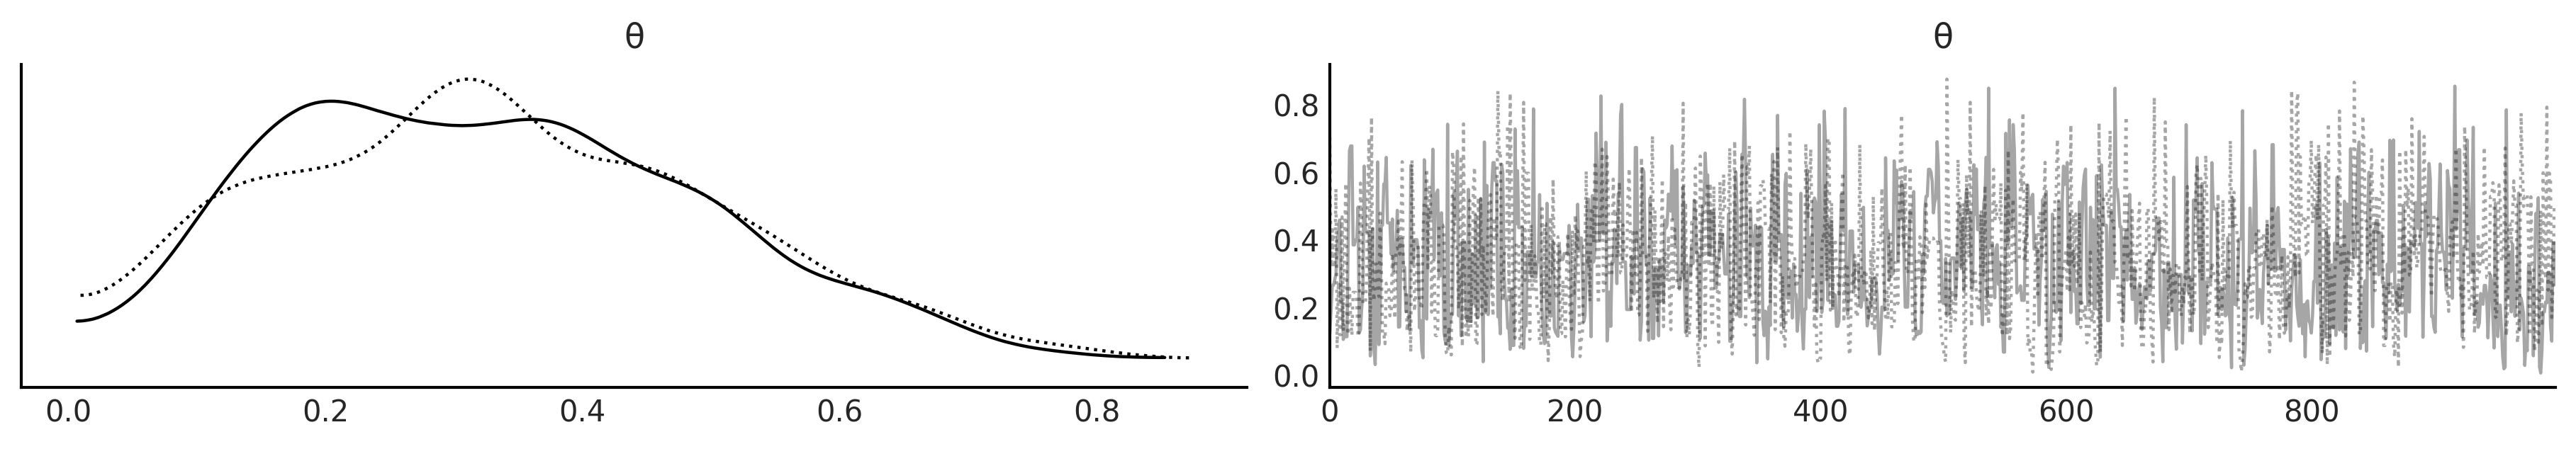

In [ ]:
az.plot_trace(idata)
az.summary(idata, kind="stats").round(2)

Above is the plot for a normal distribution which seems pretty close to the value inferred from the data.


,mean,sd,hdi_3%,hdi_97%
θ,0.48,0.07,0.34,0.62


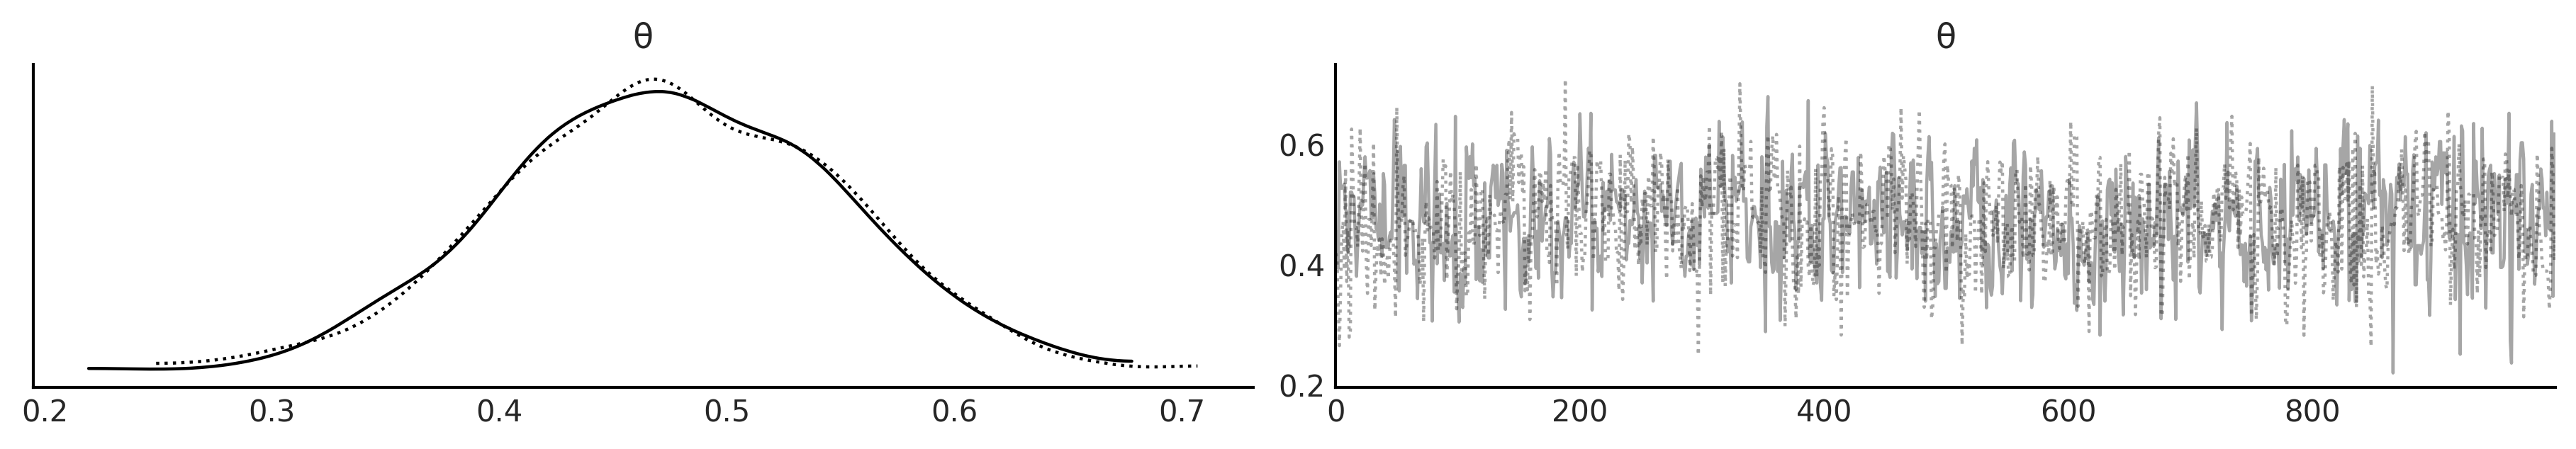

In [ ]:
with pm.Model() as our_first_model:
    θ = pm.Beta('θ', alpha=20., beta=20.)
    y = pm.Bernoulli('y', p=θ, observed=data)
    idata = pm.sample(1000, random_seed=4591)
az.plot_trace(idata)
az.summary(idata, kind="stats").round(2)

Above is the plot for a Normal like posterior. As we can see, it doesn't deviate much from the regular noraml distribution curve owing to the fact that the normal distribution is a bit rigid prior not prone to change just by a few datapoints


,mean,sd,hdi_3%,hdi_97%
θ,0.22,0.12,0.01,0.45


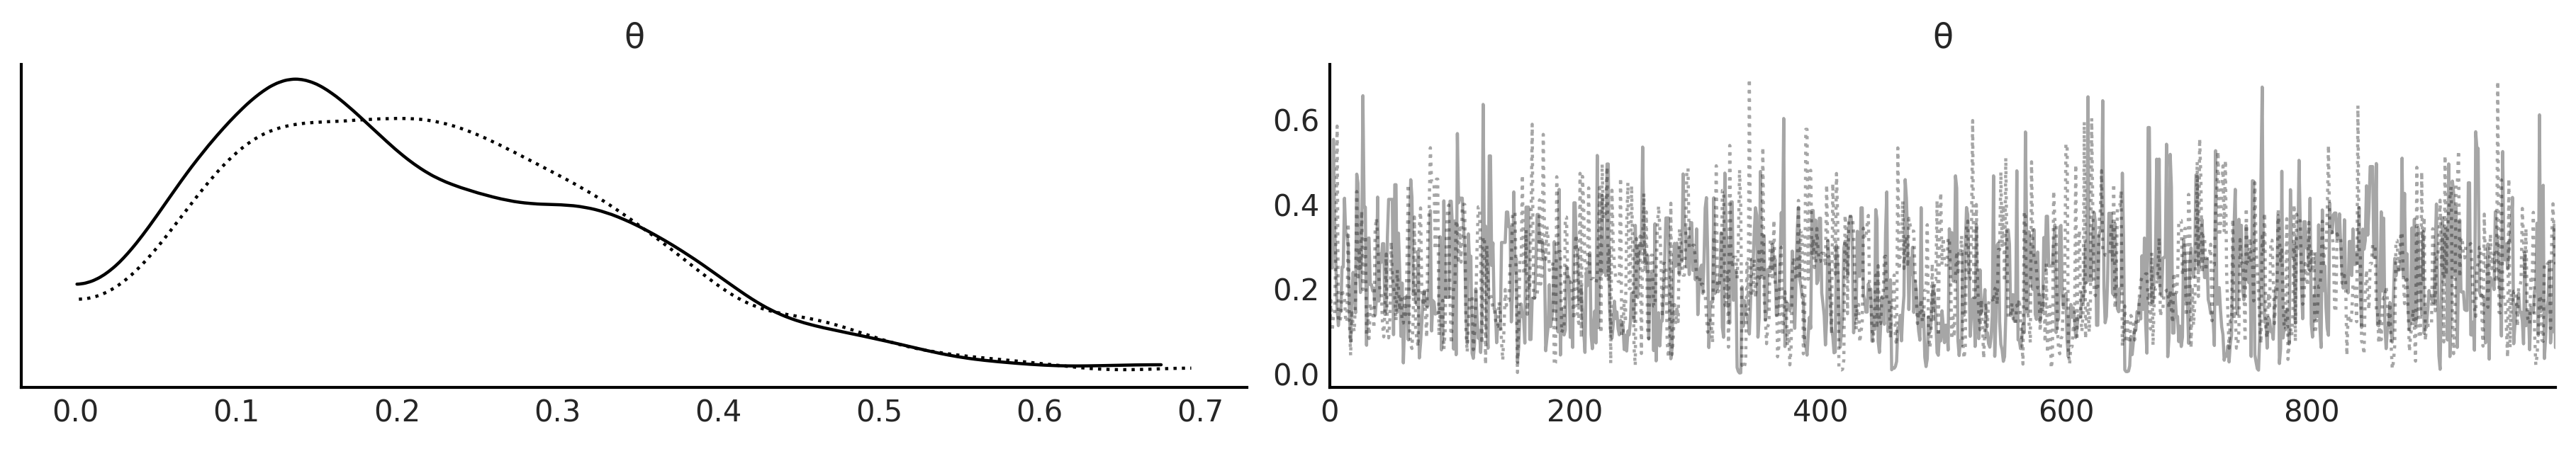

In [ ]:
with pm.Model() as our_first_model:
    θ = pm.Beta('θ', alpha=1., beta=4.)
    y = pm.Bernoulli('y', p=θ, observed=data)
    idata = pm.sample(1000, random_seed=4591)
az.plot_trace(idata)
az.summary(idata, kind="stats").round(2)

Above is the plot for a prior that is tail biased. As we can see, the given data just makes the posterior further tail biased


The 2nd week results were as follows

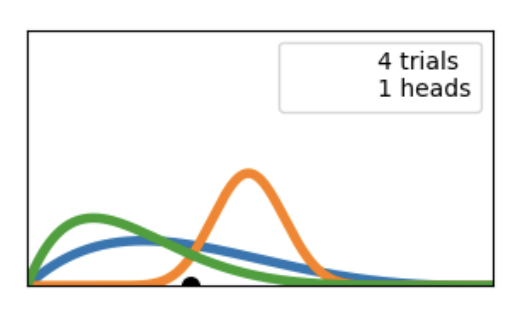

Here as we can see, the Blue, orange and green plots are respectively the results we got from a closed form method using priors as unifom, normal-like and tail biased respectively.

What we can infer is that the curves formed by the programming method are much more shaky than these of closed form due to the fact that 1) the posteriors that come after the closed form method are assumed to be in the same functional format (which makes it an approximation as no real life distribution is perfect) and 2) these values are sampled randomly as compared to linearly spaced
